In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from fbprophet import Prophet
import pycountry
import plotly.express as px
from collections import namedtuple
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

In [3]:
DJI_data = pd.read_csv("./DJI.csv",)
DJI_data.reset_index()

c = [0,4]
DJI_data = DJI_data.iloc[:,c]

DJI_data = DJI_data.rename(columns={"Date": "ds", "Close": "y"})

DJI_data

,ds,y
0,2010-01-04,10583.959961
1,2010-01-05,10572.019531
2,2010-01-06,10573.679688
3,2010-01-07,10606.860352
4,2010-01-08,10618.190430
...,...,...
2595,2020-04-27,24133.779297
2596,2020-04-28,24101.550781
2597,2020-04-29,24633.859375
2598,2020-04-30,24345.720703


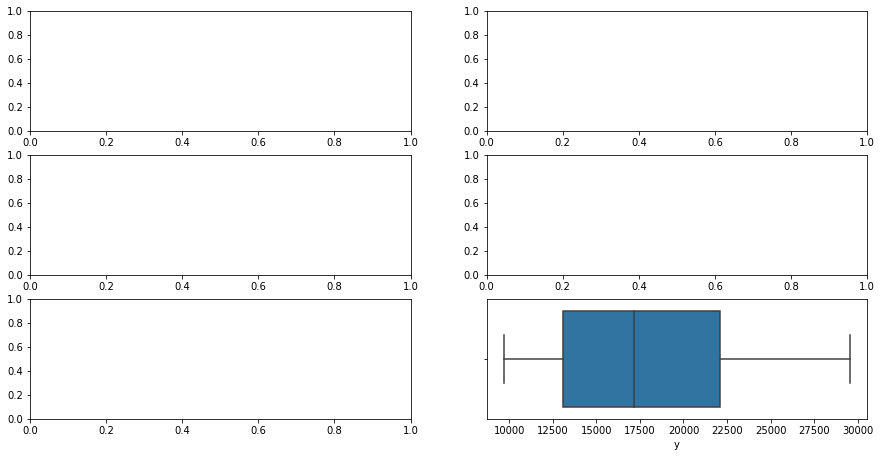

In [4]:
fig, axs = plt.subplots(3,2, figsize = (15,7.5))
plt1 = sns.boxplot(DJI_data['y'])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds          yhat    yhat_lower    yhat_upper
3569 2022-12-27  29021.104798  21818.537884  36827.310124
3570 2022-12-28  29006.847477  21763.427675  36791.730242
3571 2022-12-29  29018.287982  21988.688805  36505.394283
3572 2022-12-30  29023.399377  21207.648531  36990.711767
3573 2022-12-31  29321.371419  22127.547413  36724.008310


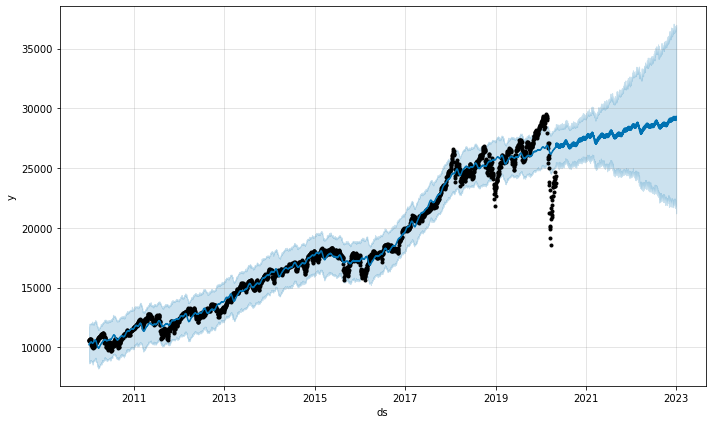

In [3]:
#DJI prediction with influence of COVID19
m = Prophet(interval_width=0.95)
m.fit(DJI_data)
future = m.make_future_dataframe(periods=974)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()
forecast = m.predict(future)
DJI_w_forecast_df = forecast[['ds', 'yhat']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
new_forecast_plot = m.plot(forecast)

In [4]:
DJI_data_without_COVID19 = DJI_data.iloc[:2528]
DJI_data_without_COVID19.tail()

,ds,y
2523,2020-01-13,28907.050781
2524,2020-01-14,28939.669922
2525,2020-01-15,29030.220703
2526,2020-01-16,29297.640625
2527,2020-01-17,29348.099609


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds          yhat    yhat_lower    yhat_upper
3507 2022-09-23  31413.778763  22634.563938  41071.823518
3508 2022-09-24  31636.400656  22691.501028  41460.000205
3509 2022-09-25  31635.379078  22750.536251  41177.483697
3510 2022-09-26  31393.815220  22530.896503  41456.164971
3511 2022-09-27  31412.323580  22506.368881  41770.403412
...         ...           ...           ...           ...
3602 2022-12-27  31988.976999  21374.590968  43382.921913
3603 2022-12-28  31981.656455  21757.578346  43157.293283
3604 2022-12-29  32000.648259  21660.983764  43391.337780
3605 2022-12-30  32012.654404  21894.340458  43286.382958
3606 2022-12-31  32247.073929  21979.470232  43882.474432

[100 rows x 4 columns]


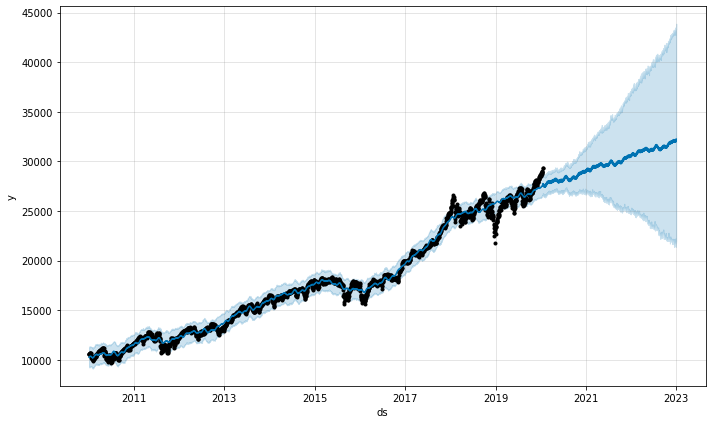

In [5]:
m = Prophet(interval_width=0.95)
m.fit(DJI_data_without_COVID19)
future = m.make_future_dataframe(periods=1079)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()
forecast = m.predict(future)
DJI_w_o_forecast_df = forecast[['ds', 'yhat']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100))
new_forecast_plot = m.plot(forecast)

In [6]:
#End of 2020 difference
diff = (DJI_w_o_forecast_df.iloc[2876][1] - DJI_w_forecast_df.iloc[2843][1])/DJI_w_o_forecast_df.iloc[2876][1]
print("End of 2020 % Diff: ", diff)

#End of 2021 difference

diff = (DJI_w_o_forecast_df.iloc[3241][1] - DJI_w_forecast_df.iloc[3208][1])/DJI_w_o_forecast_df.iloc[3241][1]
print("End of 2021 % Diff: ", diff)

#End of 2022 difference
diff = (DJI_w_o_forecast_df.iloc[3606][1] - DJI_w_forecast_df.iloc[3573][1])/DJI_w_o_forecast_df.iloc[3606][1]
print("End of 2022 % Diff: ", diff)

End of 2020 % Diff:  0.05334883541735468
End of 2021 % Diff:  0.07446804237259896
End of 2022 % Diff:  0.09072768948563542


In [7]:
#Model Accuracy 
m = Prophet(interval_width=0.95)
m.fit(DJI_data)
future = m.make_future_dataframe(periods=0)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()
forecast = m.predict(future)
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#new_forecast_plot = m.plot(forecast)

yhat_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
y_pred = yhat_df["yhat"]
y_true_df = DJI_data.iloc[:2600]
y_true = y_true_df["y"]

print("r2_score:" , r2_score(y_true, y_pred))

forecast_errors = [y_true[i]-y_pred[i] for i in range(len(y_true))]
# print('Forecast Errors: %s' % forecast_errors)
mean_forecast_error = np.mean(forecast_errors)
print('mean forecast Errors: %s' % mean_forecast_error)

bias = sum(forecast_errors) * 1.0/len(y_true)
print('Bias: %f' % bias)

mse = mean_squared_error(y_pred, y_true)
print('MSE: %f' % mse)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


r2_score: 0.9762589347852657
mean forecast Errors: 0.001802813885217172
Bias: 0.001803
MSE: 665158.449737


In [70]:
BSE_data = pd.read_csv("./India_BSE.csv",)
BSE_data.reset_index()

BSE_data = BSE_data.rename(columns={"Date": "ds", "Close": "y"})
BSE_data

,ds,y
0,2010-05-03,17386.08
1,2010-05-04,17137.14
2,2010-05-05,17087.96
3,2010-05-06,16987.53
4,2010-05-07,16769.11
...,...,...
2475,2020-04-24,31327.22
2476,2020-04-27,31743.08
2477,2020-04-28,32114.52
2478,2020-04-29,32720.16


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds          yhat    yhat_lower    yhat_upper
3450 2022-12-27  42796.055527  20953.894529  64413.229600
3451 2022-12-28  42764.678830  20743.173498  65005.387603
3452 2022-12-29  42816.740450  21315.812597  64732.548601
3453 2022-12-30  42806.792825  21053.223126  64362.841096
3454 2022-12-31  43267.408449  20935.291878  64963.462899


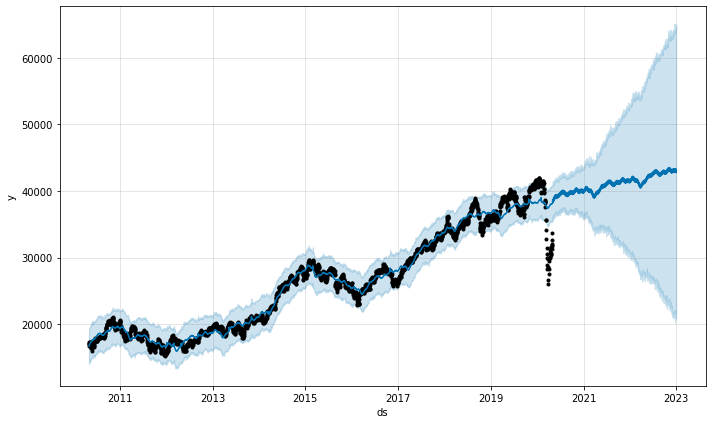

In [73]:
#BSE prediction with influence of COVID19
m = Prophet(interval_width=0.95)
m.fit(BSE_data)
future = m.make_future_dataframe(periods=975)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()
forecast = m.predict(future)
BSE_w_forecast_df = forecast[['ds', 'yhat']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
new_forecast_plot = m.plot(forecast)

In [81]:
BSE_data_without_COVID19 = BSE_data.iloc[:2411]
BSE_data_without_COVID19.tail()

,ds,y
2406,2020-01-13,41859.69
2407,2020-01-14,41952.63
2408,2020-01-15,41872.73
2409,2020-01-16,41932.56
2410,2020-01-17,41945.37


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


             ds          yhat    yhat_lower    yhat_upper
3390 2022-09-23  48464.161829  22993.360375  77104.436832
3391 2022-09-24  48748.597103  22424.507637  77888.355545
3392 2022-09-25  48619.175796  22305.751371  77359.400313
3393 2022-09-26  48441.686063  22430.366659  77012.897256
3394 2022-09-27  48417.043723  23013.815209  78019.145054
...         ...           ...           ...           ...
3485 2022-12-27  48797.104913  19331.898464  81545.207929
3486 2022-12-28  48797.027807  19474.585573  82043.053472
3487 2022-12-29  48834.227402  19311.992913  81912.757540
3488 2022-12-30  48840.141921  19814.772481  82187.456238
3489 2022-12-31  49140.174165  19260.213280  81991.268179

[100 rows x 4 columns]


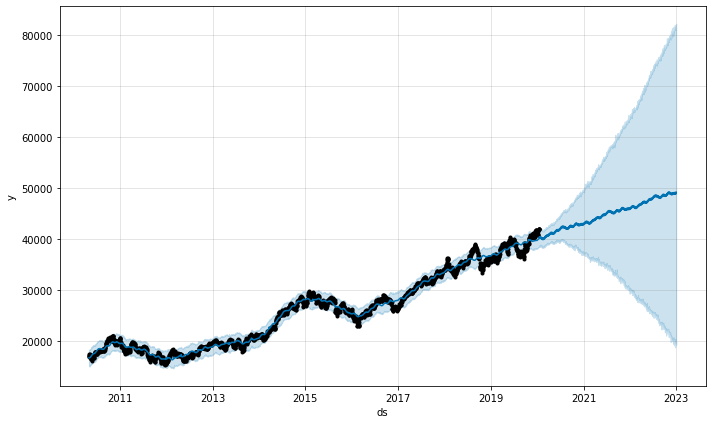

In [82]:
m = Prophet(interval_width=0.95)
m.fit(BSE_data_without_COVID19)
future = m.make_future_dataframe(periods=1079)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()
forecast = m.predict(future)
BSE_w_o_forecast_df = forecast[['ds', 'yhat']]
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(100))
new_forecast_plot = m.plot(forecast)

In [89]:
#End of 2020 difference
diff = (BSE_w_o_forecast_df.iloc[2759][1] - BSE_w_forecast_df.iloc[2724][1])/BSE_w_o_forecast_df.iloc[2759][1]
print("End of 2020 % Diff: ", diff)

#End of 2021 difference

diff = (BSE_w_o_forecast_df.iloc[3124][1] - BSE_w_forecast_df.iloc[3089][1])/BSE_w_o_forecast_df.iloc[3124][1]
print("End of 2021 % Diff: ", diff)

#End of 2022 difference
diff = (BSE_w_o_forecast_df.iloc[3489][1] - BSE_w_forecast_df.iloc[3454][1])/BSE_w_o_forecast_df.iloc[3489][1]
print("End of 2022 % Diff: ", diff)



End of 2020 % Diff:  0.07060901511625971
End of 2021 % Diff:  0.09897276066013153
End of 2022 % Diff:  0.11951047825676474


ds      2020-12-31 00:00:00
yhat                42774.5
Name: 2759, dtype: object

In [8]:
# more Accuracy Test with build method 
# from fbprophet.diagnostics import cross_validation
# df_cv = cross_validation(m, initial='2500 days', period='180 days', horizon = '365 days')
# df_cv

# prophet_accuracy_test = DJI_data.iloc[:2013]
# prophet_accuracy_test.tail()

In [10]:
# from fbprophet.diagnostics import performance_metrics
# df_p = performance_metrics(df_cv)
# df_p

In [12]:
# from fbprophet.plot import plot_cross_validation_metric
# fig = plot_cross_validation_metric(df_cv, metric='mape')

In [6]:
US_unemploy_df = pd.read_csv("./US_unemployment_rate_monthly.csv",)
US_unemploy_df.reset_index()
# US_unemploy_df

US_unemploy_df = US_unemploy_df.rename(columns={"Time": "ds", "Unemployment Rate": "y"})
US_unemploy_df

,ds,y
0,2010-01,9.8
1,2010-02,9.8
2,2010-03,9.9
3,2010-04,9.9
4,2010-05,9.6
...,...,...
118,2019-11,3.5
119,2019-12,3.5
120,2020-01,3.6
121,2020-02,3.5


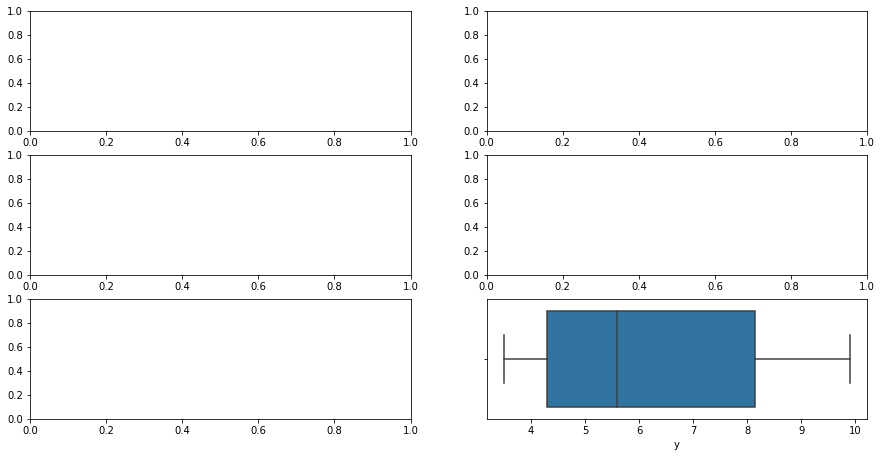

In [7]:
fig, axs = plt.subplots(3,2, figsize = (15,7.5))
plt2 = sns.boxplot(US_unemploy_df['y'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-01  9.914143    9.659972   10.157000
1   2010-02-01  9.803104    9.554832   10.048158
2   2010-03-01  9.818958    9.572866   10.059733
3   2010-04-01  9.743277    9.489815    9.986423
4   2010-05-01  9.670869    9.432699    9.909261
..         ...       ...         ...         ...
152 2022-08-31  2.907294    2.358156    3.444816
153 2022-09-30  2.877278    2.318718    3.458457
154 2022-10-31  2.974441    2.338247    3.556113
155 2022-11-30  2.819374    2.195093    3.399737
156 2022-12-31  2.720454    2.089789    3.331147

[157 rows x 4 columns]


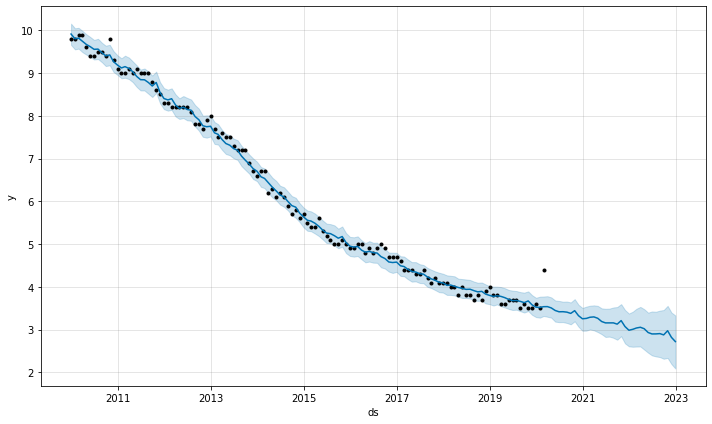

In [62]:
# m = Prophet(interval_width=0.95)
# m.fit(US_unemploy_df)
# future = m.make_future_dataframe(periods=1000)
# future_confirmed = future.copy() # for non-baseline predictions later on
# future.tail()
# forecast = m.predict(future)
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
# new_forecast_plot = m.plot(forecast)


m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(US_unemploy_df)
future = m.make_future_dataframe(periods=34, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
US_unemploy_fcst_df_w = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [63]:
US_unemploy_df_without_COVID19 = US_unemploy_df.iloc[:120]
US_unemploy_df_without_COVID19

,ds,y
0,2010-01,9.8
1,2010-02,9.8
2,2010-03,9.9
3,2010-04,9.9
4,2010-05,9.6
...,...,...
115,2019-08,3.7
116,2019-09,3.5
117,2019-10,3.6
118,2019-11,3.5


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-01  9.912573    9.715350   10.112132
1   2010-02-01  9.811091    9.610051   10.011436
2   2010-03-01  9.776813    9.589950    9.963784
3   2010-04-01  9.736390    9.538523    9.934322
4   2010-05-01  9.662602    9.459561    9.850020
..         ...       ...         ...         ...
152 2022-08-31  2.549889    1.926167    3.150125
153 2022-09-30  2.504064    1.844554    3.128912
154 2022-10-31  2.572069    1.890766    3.262359
155 2022-11-30  2.420756    1.722907    3.094725
156 2022-12-31  2.304869    1.611058    2.995574

[157 rows x 4 columns]


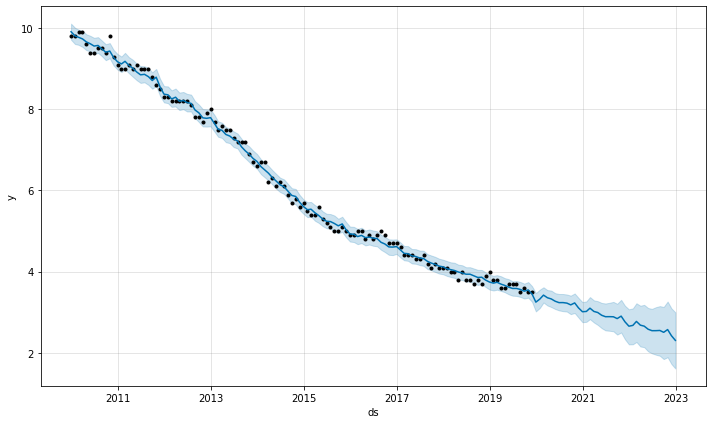

In [64]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(US_unemploy_df_without_COVID19)
future = m.make_future_dataframe(periods=37, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
US_unemploy_fcst_df_w_o = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [65]:
#Model Accuracy 
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(US_unemploy_df)
future = m.make_future_dataframe(periods=0, freq='M')
fcst = m.predict(future)
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
#new_forecast_plot = m.plot(forecast)

yhat_df = fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
y_pred = yhat_df["yhat"]

y_true_df = US_unemploy_df.iloc[:123]
y_true = y_true_df["y"]

print("r2_score:" , r2_score(y_true, y_pred))

forecast_errors = [y_true[i]-y_pred[i] for i in range(len(y_true))]
# print('Forecast Errors: %s' % forecast_errors)
mean_forecast_error = np.mean(forecast_errors)
print('mean forecast Errors: %s' % mean_forecast_error)

bias = sum(forecast_errors) * 1.0/len(y_true)
print('Bias: %f' % bias)

mse = mean_squared_error(y_pred, y_true)
print('MSE: %f' % mse)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


r2_score: 0.9950832608099259
mean forecast Errors: 0.00016150634304742928
Bias: 0.000162
MSE: 0.020953


In [66]:
#End of 2020 difference
diff = US_unemploy_fcst_df_w_o.iloc[132][1] - US_unemploy_fcst_df_w.iloc[132][1]
print("End of 2020 % Diff: ", diff)
#End of 2021 difference

diff = US_unemploy_fcst_df_w_o.iloc[144][1] - US_unemploy_fcst_df_w.iloc[144][1]
print("End of 2021 % Diff: ", diff)

# #End of 2022 difference
diff = US_unemploy_fcst_df_w_o.iloc[156][1] - US_unemploy_fcst_df_w.iloc[156][1]
print("End of 2022 % Diff: ", diff)

temp_list = []
for i in range(125,len(US_unemploy_fcst_df_w_o)):
    temp = US_unemploy_fcst_df_w_o.iloc[i][1] - US_unemploy_fcst_df_w.iloc[i][1]
    temp_list.append(temp)
print("Avg % Changed",np.mean(temp_list))

End of 2020 % Diff:  -0.2425008669005413
End of 2021 % Diff:  -0.33047281622229363
End of 2022 % Diff:  -0.415584815707176
Avg % Changed -0.2890084284478569


In [21]:
#Italy 
Italy_unemploy_df = pd.read_csv("./Italy_unemployment_rate_monthly.csv",)
Italy_unemploy_df.reset_index()
# US_unemploy_df

Italy_unemploy_df = Italy_unemploy_df.rename(columns={"Release Date": "ds", "Actual": "y"})
Italy_unemploy_df

,ds,y
0,2020-04-30,0.084
1,2020-04-01,0.097
2,2020-03-03,0.098
3,2020-01-30,0.098
4,2020-01-09,0.097
...,...,...
120,2010-04-30,0.088
121,2010-03-31,0.085
122,2010-03-01,0.086
123,2010-01-29,0.085


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-08  0.084375    0.079655    0.088828
1   2010-01-29  0.085314    0.080249    0.090506
2   2010-03-01  0.084595    0.080093    0.089286
3   2010-03-31  0.085058    0.080227    0.089835
4   2010-04-30  0.083433    0.079003    0.088044
..         ...       ...         ...         ...
152 2022-08-31  0.076946    0.065108    0.089100
153 2022-09-30  0.074560    0.062228    0.086242
154 2022-10-31  0.075961    0.063037    0.089538
155 2022-11-30  0.076168    0.062058    0.089849
156 2022-12-31  0.065949    0.052311    0.079739

[157 rows x 4 columns]


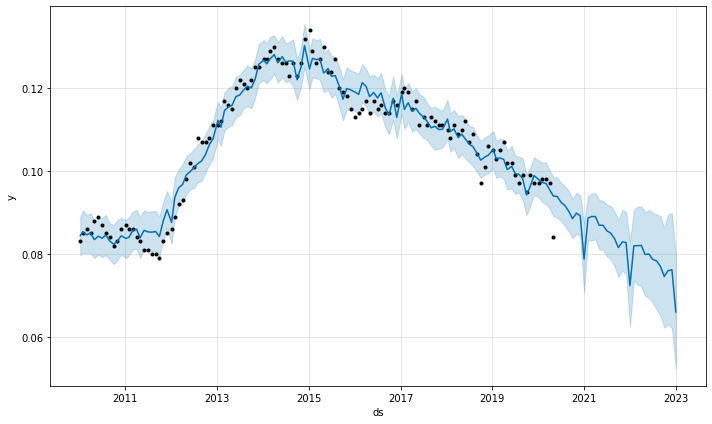

In [22]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Italy_unemploy_df)
future = m.make_future_dataframe(periods=32, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Italy_unemploy_fcst_df_w = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [23]:
Italy_unemploy_df_without_COVID19 = Italy_unemploy_df.iloc[4:]
Italy_unemploy_df_without_COVID19

,ds,y
4,2020-01-09,0.097
5,2019-11-29,0.097
6,2019-10-31,0.099
7,2019-09-30,0.095
8,2019-08-30,0.099
...,...,...
120,2010-04-30,0.088
121,2010-03-31,0.085
122,2010-03-01,0.086
123,2010-01-29,0.085


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-08  0.084748    0.080103    0.089143
1   2010-01-29  0.085566    0.080977    0.090164
2   2010-03-01  0.084993    0.080433    0.089426
3   2010-03-31  0.085240    0.080873    0.089696
4   2010-04-30  0.084386    0.080070    0.088470
..         ...       ...         ...         ...
152 2022-08-31  0.079585    0.065295    0.095373
153 2022-09-30  0.077110    0.062326    0.092899
154 2022-10-31  0.078625    0.062316    0.095669
155 2022-11-30  0.078936    0.061401    0.097091
156 2022-12-31  0.068890    0.052174    0.087246

[157 rows x 4 columns]


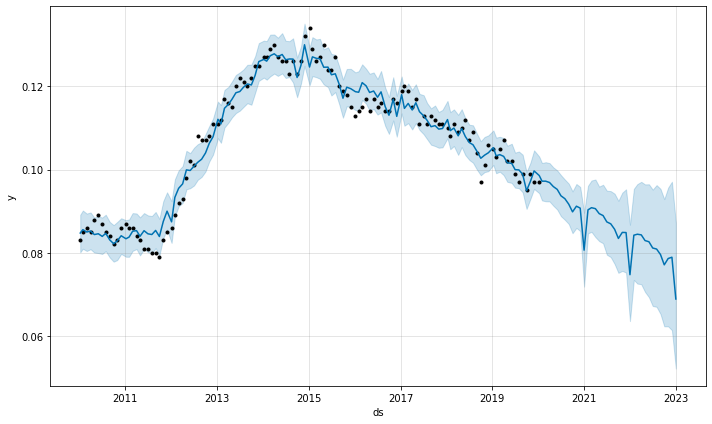

In [24]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Italy_unemploy_df_without_COVID19)
future = m.make_future_dataframe(periods=36, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Italy_unemploy_fcst_df_w_o = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [25]:
#End of 2020 difference
diff = Italy_unemploy_fcst_df_w_o.iloc[132][1] - Italy_unemploy_fcst_df_w.iloc[132][1]
print("End of 2020 % Diff: ", diff)
#End of 2021 difference

diff = Italy_unemploy_fcst_df_w_o.iloc[144][1] - Italy_unemploy_fcst_df_w.iloc[144][1]
print("End of 2021 % Diff: ", diff)

# #End of 2022 difference
diff = Italy_unemploy_fcst_df_w_o.iloc[156][1] - Italy_unemploy_fcst_df_w.iloc[156][1]
print("End of 2022 % Diff: ", diff)

temp_list = []
for i in range(125,len(Italy_unemploy_fcst_df_w_o)):
    temp = Italy_unemploy_fcst_df_w_o.iloc[i][1] - Italy_unemploy_fcst_df_w.iloc[i][1]
    temp_list.append(temp)
print("Avg % Changed",np.mean(temp_list))

End of 2020 % Diff:  0.001879895704813131
End of 2021 % Diff:  0.0024142235663866113
End of 2022 % Diff:  0.0029406364813671787
Avg % Changed 0.002089309289735774


In [28]:
#India
India_unemploy_df = pd.read_csv("./India_unemployment_rate_monthly.csv",)
India_unemploy_df.reset_index()
# US_unemploy_df

India_unemploy_df = India_unemploy_df.rename(columns={"Release Date": "ds", "Actual": "y"})
India_unemploy_df

,ds,y
0,2020-04-03,0.044
1,2020-03-06,0.035
2,2020-02-07,0.036
3,2020-01-10,0.035
4,2019-12-06,0.035
...,...,...
119,2010-05-07,0.099
120,2010-04-02,0.097
121,2010-03-05,0.097
122,2010-02-05,0.097


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-08  0.099609    0.097265    0.102046
1   2010-02-05  0.097961    0.095616    0.100376
2   2010-03-05  0.097161    0.094864    0.099720
3   2010-04-02  0.097964    0.095368    0.100409
4   2010-05-07  0.097160    0.094663    0.099670
..         ...       ...         ...         ...
152 2022-08-31  0.030414    0.025316    0.035718
153 2022-09-30  0.028010    0.023014    0.033026
154 2022-10-31  0.029342    0.023877    0.034840
155 2022-11-30  0.029887    0.024119    0.035767
156 2022-12-31  0.029245    0.023407    0.035323

[157 rows x 4 columns]


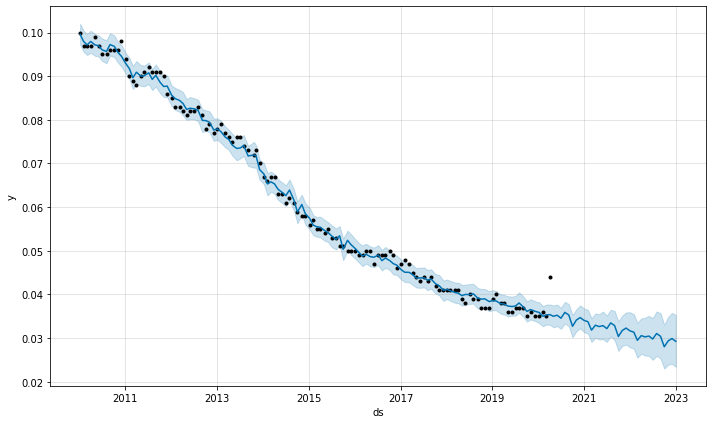

In [43]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(India_unemploy_df)
future = m.make_future_dataframe(periods=33, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
India_unemploy_fcst_df_w = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [44]:
India_unemploy_df_without_COVID19 = India_unemploy_df.iloc[4:]
India_unemploy_df_without_COVID19

,ds,y
4,2019-12-06,0.035
5,2019-11-01,0.036
6,2019-10-04,0.035
7,2019-09-06,0.037
8,2019-08-02,0.037
...,...,...
119,2010-05-07,0.099
120,2010-04-02,0.097
121,2010-03-05,0.097
122,2010-02-05,0.097


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-08  0.099695    0.097597    0.101894
1   2010-02-05  0.097792    0.095623    0.099888
2   2010-03-05  0.097195    0.095126    0.099425
3   2010-04-02  0.097315    0.095233    0.099375
4   2010-05-07  0.097081    0.094904    0.099309
..         ...       ...         ...         ...
152 2022-08-31  0.026046    0.019971    0.031963
153 2022-09-30  0.024108    0.018361    0.029882
154 2022-10-31  0.024995    0.018802    0.030927
155 2022-11-30  0.025246    0.018496    0.031859
156 2022-12-31  0.024591    0.017896    0.031663

[157 rows x 4 columns]


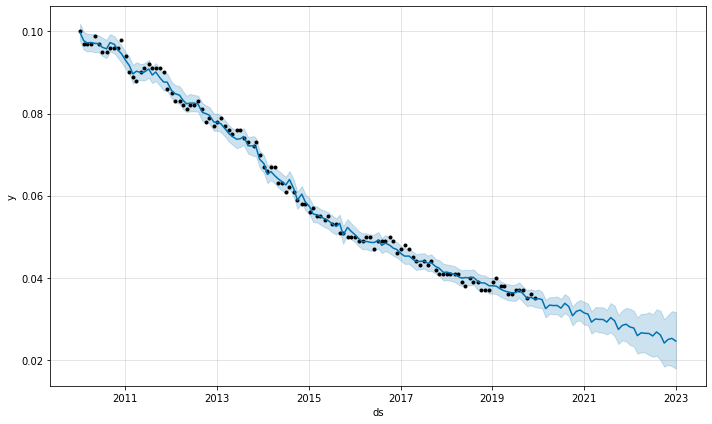

In [45]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(India_unemploy_df_without_COVID19)
future = m.make_future_dataframe(periods=37, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
India_unemploy_fcst_df_w_o = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [46]:
#End of 2020 difference
diff = India_unemploy_fcst_df_w_o.iloc[132][1] - India_unemploy_fcst_df_w.iloc[132][1]
print("End of 2020 % Diff: ", diff)
#End of 2021 difference

diff = India_unemploy_fcst_df_w_o.iloc[144][1] - India_unemploy_fcst_df_w.iloc[144][1]
print("End of 2021 % Diff: ", diff)

# #End of 2022 difference
diff = India_unemploy_fcst_df_w_o.iloc[156][1] - India_unemploy_fcst_df_w.iloc[156][1]
print("End of 2022 % Diff: ", diff)

temp_list = []
for i in range(125,len(India_unemploy_fcst_df_w_o)):
    temp = India_unemploy_fcst_df_w_o.iloc[i][1] - India_unemploy_fcst_df_w.iloc[i][1]
    temp_list.append(temp)
print("Avg % Changed",np.mean(temp_list))

End of 2020 % Diff:  -0.0026098198062439737
End of 2021 % Diff:  -0.003631480922484564
End of 2022 % Diff:  -0.004653688182009567
Avg % Changed -0.003236718222081987


In [48]:
#Poland
Poland_unemploy_df = pd.read_csv("./Poland_unemployment_rate_monthly.csv",)
Poland_unemploy_df.reset_index()
# US_unemploy_df

Poland_unemploy_df = Poland_unemploy_df.rename(columns={"Release Date": "ds", "Actual": "y"})
Poland_unemploy_df

,ds,y
0,2020-04-24,0.054
1,2020-03-24,0.055
2,2020-02-25,0.055
3,2020-01-27,0.052
4,2019-12-23,0.051
...,...,...
114,2010-11-01,0.115
115,2010-10-01,0.115
116,2010-09-01,0.114
117,2010-08-01,0.115


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-07-01  0.117641    0.115835    0.119483
1   2010-08-01  0.115986    0.114162    0.117664
2   2010-09-01  0.115710    0.113911    0.117453
3   2010-10-01  0.115360    0.113614    0.117059
4   2010-11-01  0.115032    0.113200    0.116800
..         ...       ...         ...         ...
147 2022-08-31  0.033566    0.021773    0.045242
148 2022-09-30  0.032883    0.020870    0.045057
149 2022-10-31  0.032169    0.019054    0.045178
150 2022-11-30  0.031999    0.018577    0.045522
151 2022-12-31  0.032786    0.017858    0.047626

[152 rows x 4 columns]


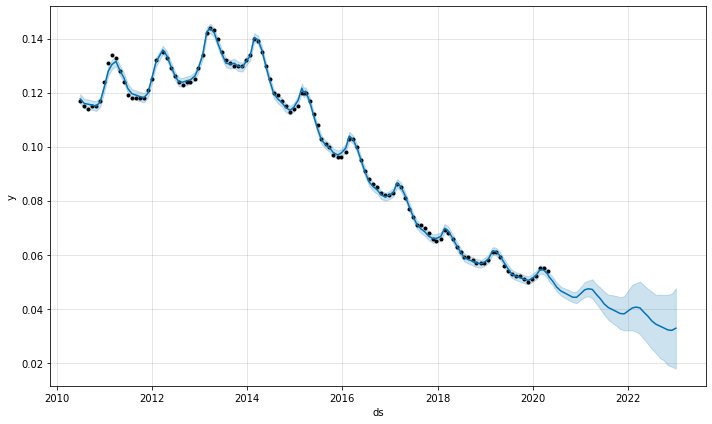

In [49]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Poland_unemploy_df)
future = m.make_future_dataframe(periods=33, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Poland_unemploy_fcst_df_w = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-07-01  0.117470    0.115685    0.119156
1   2010-08-01  0.115900    0.114221    0.117697
2   2010-09-01  0.115757    0.114020    0.117613
3   2010-10-01  0.115452    0.113692    0.117183
4   2010-11-01  0.115077    0.113239    0.116802
..         ...       ...         ...         ...
147 2022-08-31  0.030058    0.015264    0.043808
148 2022-09-30  0.029317    0.014372    0.044065
149 2022-10-31  0.028521    0.012378    0.043939
150 2022-11-30  0.028230    0.011043    0.044255
151 2022-12-31  0.028789    0.010415    0.046224

[152 rows x 4 columns]


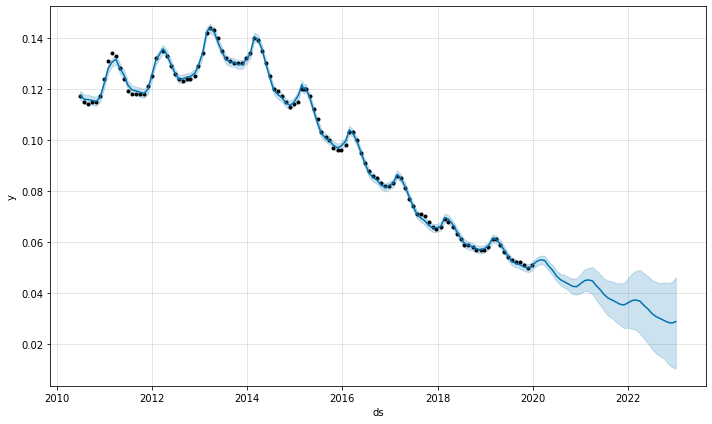

In [50]:
Poland_unemploy_df_without_COVID19 = Poland_unemploy_df.iloc[4:]
Poland_unemploy_df_without_COVID19
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Poland_unemploy_df_without_COVID19)
future = m.make_future_dataframe(periods=37, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Poland_unemploy_fcst_df_w_o = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [54]:
#End of 2020 difference
diff = Poland_unemploy_fcst_df_w_o.iloc[127][1] - Poland_unemploy_fcst_df_w.iloc[127][1]
print("End of 2020 % Diff: ", diff)
#End of 2021 difference

diff = Poland_unemploy_fcst_df_w_o.iloc[139][1] - Poland_unemploy_fcst_df_w.iloc[139][1]
print("End of 2021 % Diff: ", diff)

# #End of 2022 difference
diff = Poland_unemploy_fcst_df_w_o.iloc[151][1] - Poland_unemploy_fcst_df_w.iloc[151][1]
print("End of 2022 % Diff: ", diff)

temp_list = []
for i in range(120,len(Poland_unemploy_fcst_df_w_o)):
    temp = Poland_unemploy_fcst_df_w_o.iloc[i][1] - Poland_unemploy_fcst_df_w.iloc[i][1]
    temp_list.append(temp)
print("Avg % Changed",np.mean(temp_list))

End of 2020 % Diff:  -0.0018928754795903419
End of 2021 % Diff:  -0.0029454135102636725
End of 2022 % Diff:  -0.003996999657376429
Avg % Changed -0.0026542295084970003


In [55]:
#Brazil
Brazil_unemploy_df = pd.read_csv("./Brazil_unemployment_rate_monthly.csv",)
Brazil_unemploy_df.reset_index()
# US_unemploy_df

Brazil_unemploy_df = Brazil_unemploy_df.rename(columns={"elease Date": "ds", "Actual": "y"})
Brazil_unemploy_df

,ds,y
0,2020-04-30,0.122
1,2020-03-31,0.116
2,2020-02-28,0.112
3,2020-01-31,0.110
4,2019-12-27,0.112
...,...,...
115,2010-05-01,0.073
116,2010-04-01,0.076
117,2010-03-01,0.074
118,2010-02-01,0.072


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-01  0.068552    0.063303    0.073960
1   2010-02-01  0.067387    0.062289    0.072809
2   2010-03-01  0.067117    0.062228    0.072331
3   2010-04-01  0.071798    0.066770    0.077058
4   2010-05-01  0.073584    0.068426    0.078618
..         ...       ...         ...         ...
147 2022-08-31  0.107699    0.086758    0.128235
148 2022-09-30  0.106674    0.084756    0.127827
149 2022-10-31  0.103994    0.081720    0.126330
150 2022-11-30  0.101584    0.079597    0.124684
151 2022-12-31  0.099768    0.076282    0.124274

[152 rows x 4 columns]


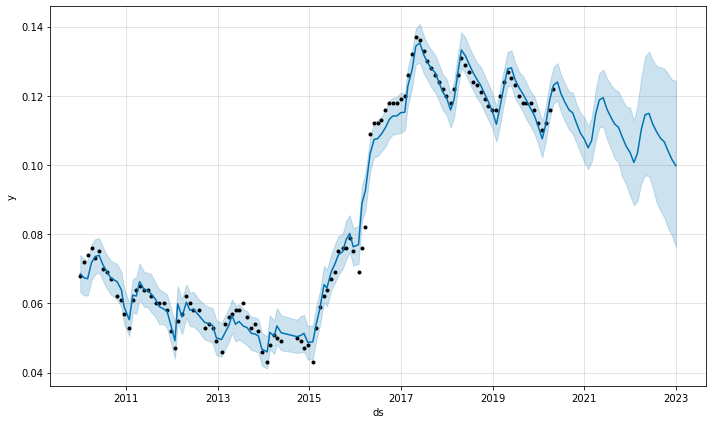

In [56]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Brazil_unemploy_df)
future = m.make_future_dataframe(periods=32, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Brazil_unemploy_fcst_df_w = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds      yhat  yhat_lower  yhat_upper
0   2010-01-01  0.068715    0.062892    0.073773
1   2010-02-01  0.067280    0.061939    0.072458
2   2010-03-01  0.067147    0.062046    0.072048
3   2010-04-01  0.072471    0.067347    0.077546
4   2010-05-01  0.073794    0.068732    0.079081
..         ...       ...         ...         ...
148 2022-08-31  0.108766    0.083315    0.134502
149 2022-09-30  0.107969    0.082030    0.134501
150 2022-10-31  0.105205    0.078243    0.131936
151 2022-11-30  0.102586    0.075241    0.130629
152 2022-12-31  0.100965    0.072521    0.130232

[153 rows x 4 columns]


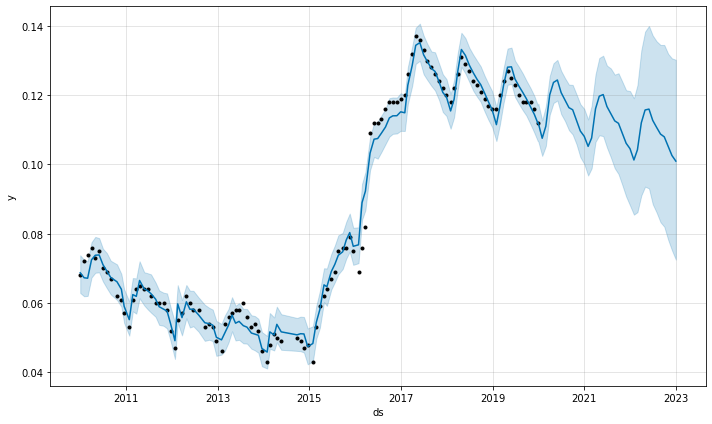

In [58]:
Brazil_unemploy_df_without_COVID19 = Brazil_unemploy_df.iloc[4:]
Brazil_unemploy_df_without_COVID19
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(Brazil_unemploy_df_without_COVID19)
future = m.make_future_dataframe(periods=37, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
Brazil_unemploy_fcst_df_w_o = fcst[['ds', 'yhat']]
print(fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

In [60]:
#End of 2020 difference
diff = Brazil_unemploy_fcst_df_w_o.iloc[128][1] - Brazil_unemploy_fcst_df_w.iloc[127][1]
print("End of 2020 % Diff: ", diff)
#End of 2021 difference

diff = Brazil_unemploy_fcst_df_w_o.iloc[140][1] - Brazil_unemploy_fcst_df_w.iloc[139][1]
print("End of 2021 % Diff: ", diff)

# #End of 2022 difference
diff = Brazil_unemploy_fcst_df_w_o.iloc[152][1] - Brazil_unemploy_fcst_df_w.iloc[151][1]
print("End of 2022 % Diff: ", diff)

temp_list = []
for i in range(120,len(Brazil_unemploy_fcst_df_w)):
    temp = Brazil_unemploy_fcst_df_w_o.iloc[i+1][1] - Brazil_unemploy_fcst_df_w.iloc[i][1]
    temp_list.append(temp)
print("Avg % Changed",np.mean(temp_list))

End of 2020 % Diff:  0.0006405444343933753
End of 2021 % Diff:  0.0009186397240051047
End of 2022 % Diff:  0.0011971445058030078
Avg % Changed 0.000852808452076536
